In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import colormaps as cmaps

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib.gridspec import GridSpec

# Classifier plotting
This code simply takes the files produced by `classifier running.ipynb` and produces the plots seen in the paper. Some changes have been made combining multiple figure into one, but the same data is still being plotted throughout. This data is found in the `agren_40_long` (i.e. data generated using model trained on 40 GSMs which were pressented by agren, long meaning traiend for 32 full dataset epochs).

In [9]:
acc_seen_df = pd.read_csv("./agren_40_long/emb_class_acc.csv")
acc_unseen_df = pd.read_csv("./agren_40_long/unused_accs.csv")
liver_df = pd.read_csv("./agren_40_long/nc_emb_Tl.csv").set_index("label")

In [10]:
liver_high_score_columns = sorted(liver_df.columns[liver_df.max() > 0.01])

In [11]:
renaming = pd.read_csv("./agren_40_long/seen_renaming.csv")

renaming_dict = {
    origional : rename
    for origional, rename in zip(renaming['origional'], renaming['rename'])
}

In [12]:
classifiers = sorted(acc_seen_df.columns.difference(['label', 'classifier_n']))
temp = classifiers[3]
classifiers[3] = classifiers[2]
classifiers[2] = temp

In [13]:
seen_labels = sorted(acc_seen_df['label'].unique())
classifier_colors = cmaps.WhiteBlue.discrete(7).colors[2:-1]

/tmp/ipykernel_5139/261778831.py:44: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


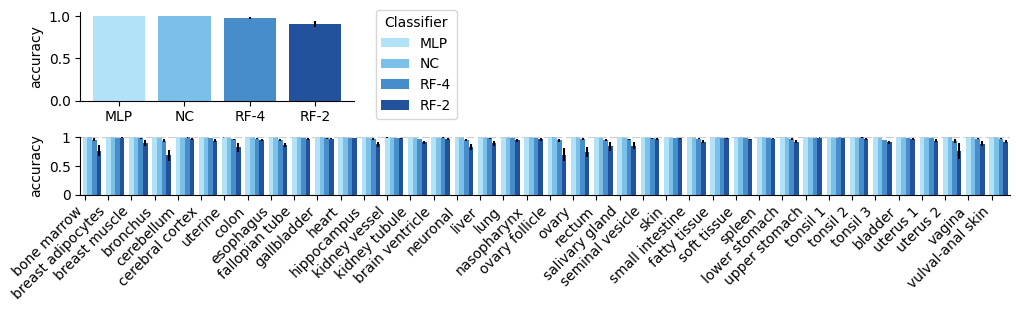

In [14]:

# Top Acc Plot
fig = plt.figure(figsize=(12, 4))

gs = GridSpec(10, 3, figure=fig)

ax = fig.add_subplot(gs[4:6,:])
axa = fig.add_subplot(gs[0:3,0])


x = np.arange(len(seen_labels))
width = 0.2

fontsize=12

for i, c in enumerate(classifiers):
    offset = i * width

    accs = acc_seen_df.groupby('label')[c].mean()
    errs = acc_seen_df.groupby('label')[c].std().fillna(0)
    
    ax.bar(x + offset, accs, yerr=errs, width=width, color=classifier_colors[i], label=c)

ax.set_xticks(x, renaming['rename'], rotation=45, ha='right')
ax.plot([-width, len(seen_labels) - width], [1, 1], color=[0.8, 0.8, 0.8], linestyle='--')
ax.set_xlim([-width, len(seen_labels) - width])
ax.set_ylim([0,1])
yt = ax.set_yticks([0, 0.5, 1], labels=[0, 0.5, 1])

ax.spines[["top", 'right']].set_visible(False)
ax.set_ylabel("accuracy")

# Average acc

label_accs = acc_seen_df.groupby('label').mean()
label_errss = acc_seen_df.groupby('label').std().fillna(0)

axa.bar(np.arange(4), label_accs.mean()[classifiers], yerr=label_errss.mean()[classifiers], color=classifier_colors)
axa.set_xticks(np.arange(4), classifiers)
axa.set_yticks([0, 0.5, 1])
axa.spines[["top", "right"]].set_visible(False)
axa.set_ylabel("accuracy")


fig.tight_layout()
ax.legend(title="Classifier", bbox_to_anchor=(0.31, 1.2, 0.5, 0.5))
fig.savefig("./images/seen_classifiers_breakdown.png", dpi=600)


In [15]:
yt

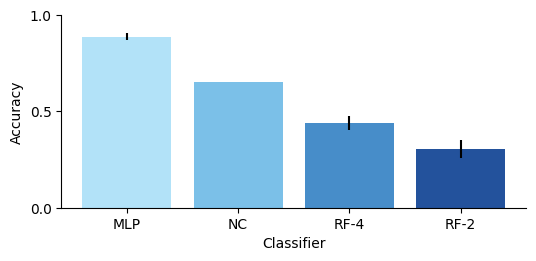

In [16]:

# Unseen accs
fig, ax = plt.subplots(1,1, figsize=(6, 2.5))

label_accs = acc_unseen_df.groupby('label').mean()
label_errss = acc_unseen_df.groupby('label').std().fillna(0)

ax.bar(np.arange(4), label_accs.mean()[classifiers], yerr=label_errss.mean()[classifiers], color=classifier_colors)
ax.set_xticks(np.arange(4), classifiers)
ax.set_yticks([0, 0.5, 1])
ax.spines[["top", "right"]].set_visible(False)
ax.set_ylabel("Accuracy")
ax.set_xlabel("Classifier")

fig.savefig("./images/unseen_classifiers.png", dpi=600)

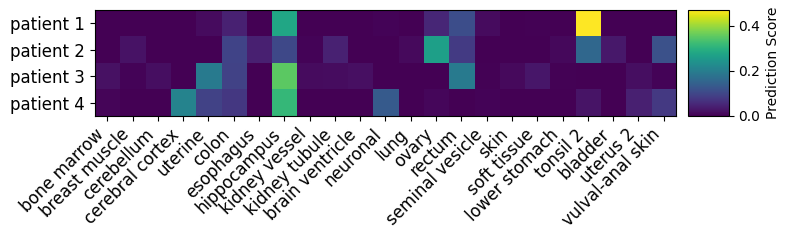

In [17]:

# Heatmap
fig, ax = plt.subplots(1,1, figsize=(8, 2.5))

im = ax.imshow(liver_df[liver_high_score_columns], aspect='auto', interpolation='nearest')

ax3_divider = make_axes_locatable(ax)
cax = ax3_divider.append_axes("right", size="7%", pad="2%")

fig.colorbar(im, label="Prediction Score", aspect=5, anchor=(-0.2, 0.5), cax=cax)
ax.set_yticks(range(4), [f"patient {i + 1}" for i in range(4)], fontsize=fontsize)

x_tick_labels = list(map(renaming_dict.__getitem__, liver_high_score_columns))
ax.set_xticks(np.arange(len(liver_high_score_columns)), x_tick_labels, rotation=45, fontsize=fontsize, ha='right')

fig.tight_layout()
fig.savefig("./images/liver_patients.png", dpi=600)

In [18]:
print("Average Accuracy")
acc_seen_df.mean()

Average Accuracy


/tmp/ipykernel_5139/2622043215.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  acc_seen_df.mean()


NC               0.999510
MLP              0.999148
RF-4             0.974176
RF-2             0.907374
classifier_n    39.000000
dtype: float64

In [19]:
acc_unseen_df.mean()

/tmp/ipykernel_5139/802321439.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  acc_unseen_df.mean()


NC      0.652480
MLP     0.888295
RF-4    0.439178
RF-2    0.304635
dtype: float64